# Polynomial Curve Fitting

In [25]:
using Distributions
using Plots

## 1-order function

In [26]:
# Set Parameters
dist = Normal(0.0, 0.1)
base(x) = x
gen(x) = base(x) + rand(dist, length(x))

gen (generic function with 1 method)

In [27]:
# Set Function to Generate Polynomial Matrix
function polynomial_matrix(x, N)
    m = length(x)
    X = fill(1.0, m)
    for j in 1:N
        x_vec = x .^ j
        X = hcat(X, x_vec)
    end
    return X
end

polynomial_matrix (generic function with 1 method)

In [28]:
# Set Function to Calculate Coefficient
function weight(x, y, N)
    X = polynomial_matrix(x, N)
    w = (X' * X) \ X' * y
    return w
end

weight (generic function with 1 method)

In [29]:
# Set Function to Output Value
function f(x, w)
    X = polynomial_matrix(x, length(w)-1)
    y = X * w
    return y
end

f (generic function with 1 method)

In [30]:
M = 9
N = 1
step = 1.0 / (M - 1)
x = collect(0.0:step:1.0)
y = gen(x)
println("x = ", x)
println("y = ", y)

x = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
y = [0.09925407837996594, -0.07727932698195994, 0.26001507162955184, 0.445661330688904, 0.4158735884336048, 0.6158176833442103, 0.8900695158249813, 1.0354937019903405, 1.0503244083539192]


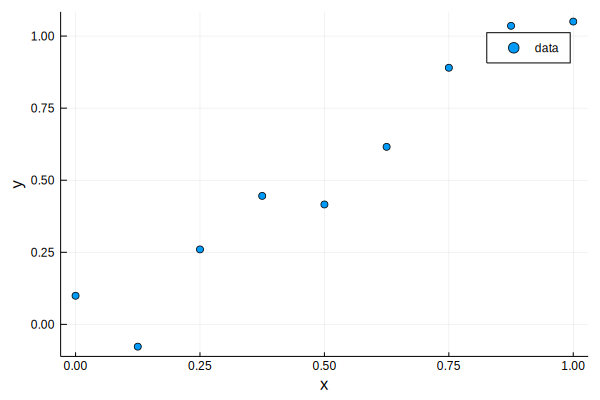

In [31]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")

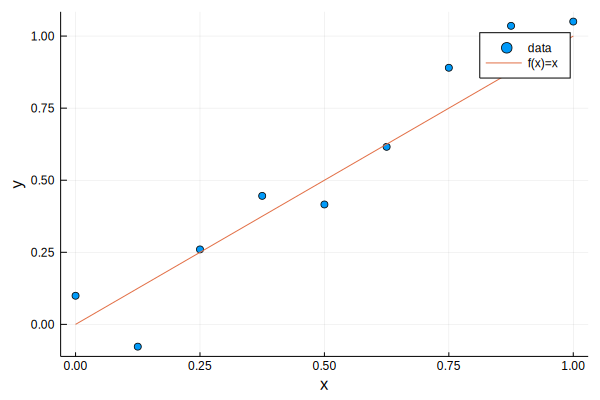

In [32]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")
plot!(x, base(x), label="f(x)=x")

In [33]:
w = weight(x, y, N)
println("w = ", w)
println("f(x) = ", f(x, w))

w = [-0.04538770411686771, 1.1430487530478506]
f(x) = [-0.04538770411686771, 0.09749339001411361, 0.24037448414509494, 0.38325557827607626, 0.5261366724070575, 0.6690177665380388, 0.8118988606690203, 0.9547799548000016, 1.0976610489309828]


In [34]:
function E(x, y, a, b)
    SSR = []
    for k in 1:length(a)
        push!(SSR, sum((y .- a[k]*x .- b[k]) .^ 2.0))
    end
    return SSR
end

E (generic function with 1 method)

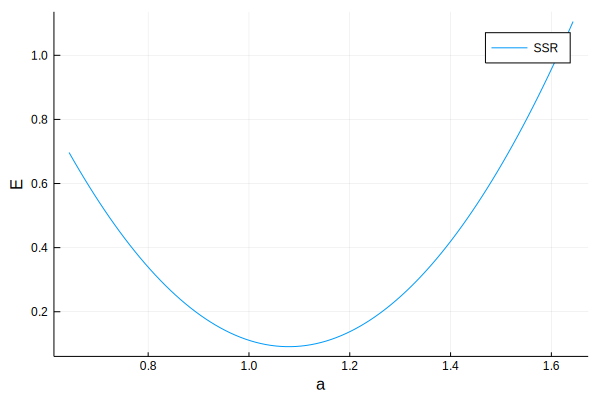

In [35]:
graph_a = collect(w[2]-0.5:0.01:w[2]+0.5)
graph_b = fill(0.0, length(graph_a))
scatter(xlabel="a", ylabel="E")
plot!(graph_a, E(x, y, graph_a, graph_b), label="SSR")

┌ Info: Saved animation to 
│   fn = /home/koba/github/prml_julia/1_Introduction/tmp.gif
└ @ Plots /home/koba/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/koba/github/prml_julia/1_Introduction/tmp.gif")
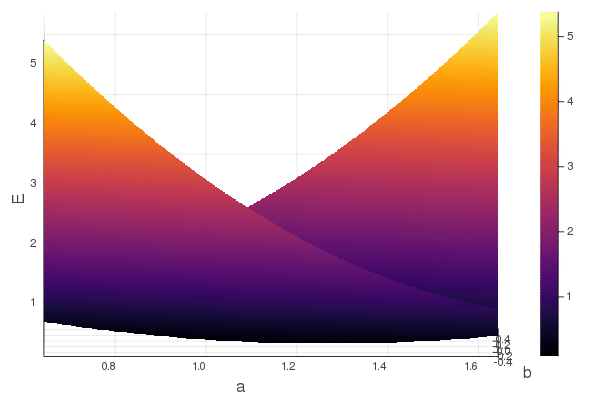

In [36]:
graph_a = collect(w[2]-0.5:0.01:w[2]+0.5)
graph_b = collect(w[1]-0.5:0.01:w[1]+0.5)
A = Array{Float64, 2}(undef, length(graph_a), 0)
for b in w[1]-0.5:0.01:w[1]+0.5
    E(x, y, graph_a, fill(b, length(graph_a)))
    A = hcat(A, E(x, y, graph_a, fill(b, length(graph_a))))
end

A = convert(Array{Float64, 2}, A)'
surface(A)
@gif for θ in 0:1:90
    surface(graph_a, graph_b, A, camera=(θ, 10), xlabel="a", ylabel="b", zlabel="E")
end

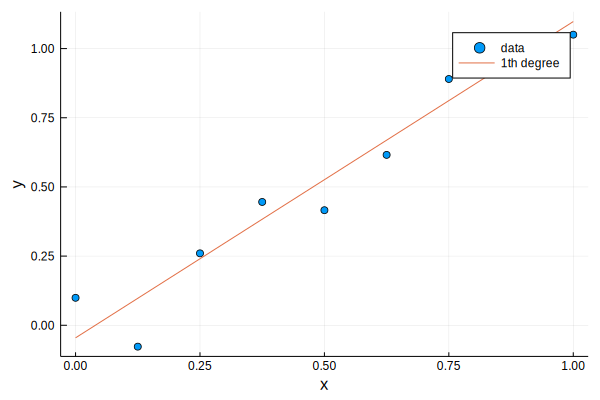

In [37]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")
graph_x = collect(0.0:0.01:1.0)
plot!(graph_x, f(graph_x, w), label=string(N, "th degree"))

## n-order function

In [38]:
# Set Function to Generate Data
dist = Normal(0.0, 0.1)
base(x) = sin.(2pi*x)
gen(x) = base(x) + rand(dist, length(x))

gen (generic function with 1 method)

In [39]:
M = 9
N = 9
step = 1.0 / (M - 1)
x = collect(0.0:step:1.0)
y = gen(x)
println("x = ", x)
println("y = ", y)

x = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
y = [0.06343788538483663, 0.792090155540759, 1.053437121178711, 0.5798744015371385, 0.05117919949373146, -0.7106301458779827, -1.128797504878325, -0.6542772932781921, -0.15469346001821357]


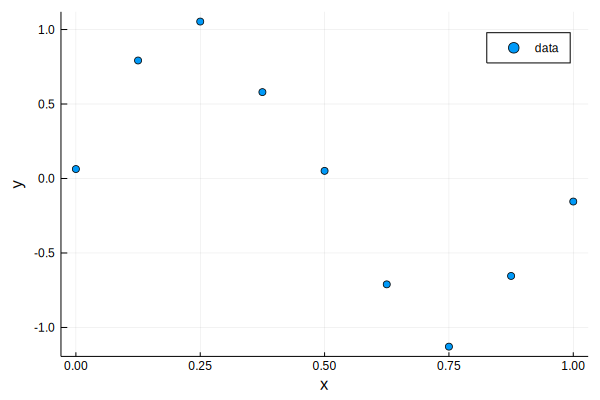

In [53]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")

In [54]:
w = weight(x, y, N)
println("w = ", w)

w = [0.06343788762877324, -9.475879342255906, 285.76694818505325, -1851.3762267817917, 5043.3092173639025, -5302.496586886771, -2752.7103406651313, 11797.809514156803, -10175.00223374843, 2963.957456372419]


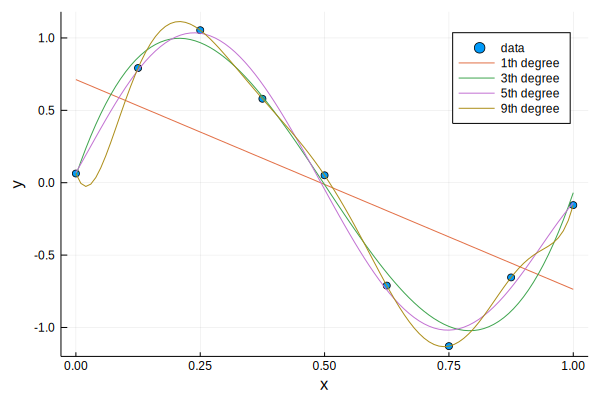

In [55]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")
graph_x = collect(0.0:0.01:1.0)
E_RMS_train = []
for d in 1:N
    w = weight(x, y, d)
    if N%d==0 || N%(d-1)==1
        plot!(graph_x, f(graph_x, w), label=string(d, "th degree"))
    end
    push!(E_RMS_train, sqrt(sum((y .- f(x, w)) .^2) / length(y)))
end
plot!()

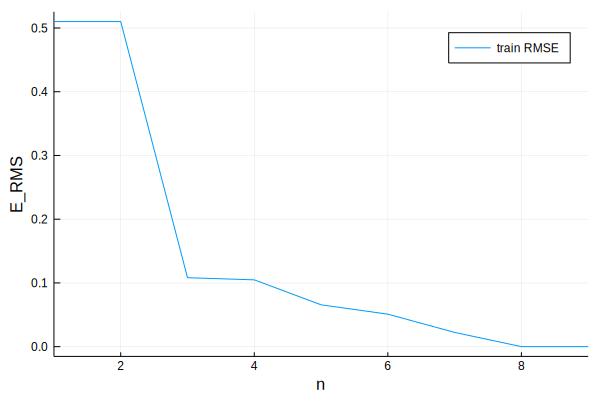

In [56]:
gr()
scatter(xlabel="n", ylabel="E_RMS")
graph_x = collect(1:N)
plot!(graph_x, E_RMS_train, xlim=(1, N), label=string("train RMSE"))

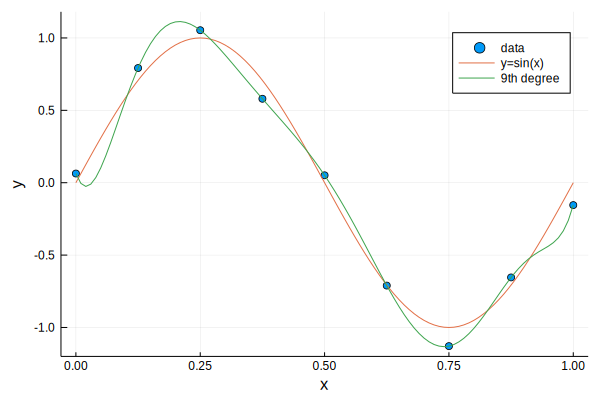

In [57]:
gr()
w = weight(x, y, N)
scatter(x, f(x, w), xlabel="x", ylabel="y", label="data")
graph_x = collect(0.0:0.01:1.0)
graph_y = f(graph_x, w)
plot!(graph_x, base(graph_x), label=string("y=sin(x)"))
plot!(graph_x, graph_y, label=string(N, "th degree"))

In [60]:
point_x = rand(10000)
point_y = gen(point_x)

E_RMS_test = []
for d in 1:N
    w = weight(x, y, d)
    push!(E_RMS_test, sqrt(sum((point_y .- f(point_x, w)) .^2) / length(point_y)))
end

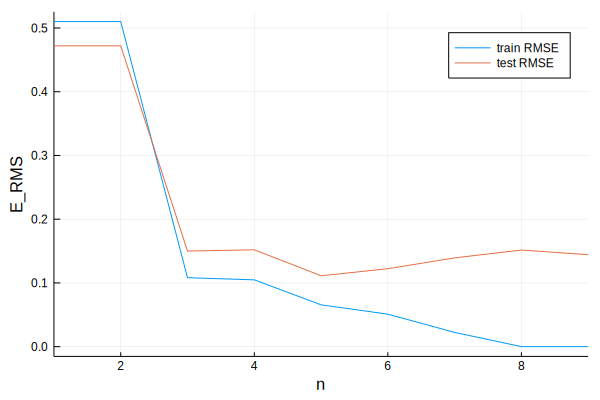

In [61]:
gr()
scatter(xlabel="n", ylabel="E_RMS")
graph_x = collect(1:N)
plot!(graph_x, E_RMS_train, xlim=(1, N), label=string("train RMSE"))
plot!(graph_x, E_RMS_test, xlim=(1, N), label=string("test RMSE"))